# Iris Multi Output Classification (Multilayer Perceptron)

___________

<img src="architecture info.png" alt="architecture info">


https://ars.els-cdn.com/content/image/3-s2.0-B9780128147610000034-f03-01-9780128147610.jpg

_______

<img src="architecture description.png" alt="architecture description" width="500">

<img src="terminology.png" alt="terminology"  width="500">

_______

## La arquitectura, construida en PyTorch, luciría así:

> ### - Cada bloque de color, representa la matriz de pesos que creamos usando `nn.Linear()`, **especificando las características de entrada**, y las de **salida**

> ### - Entre cada uno, usamos las distintas funciones de activación como `nn.ReLU()` entre capas, o `nn.Softmax()` en la última capa en este caso particular

> ### - Recuerda que el bias pertenece a cada capa, y no toma ninguna entrada, por eso solo tiene únicamente las conexiones adheridas a los nodos de su misma capa actual. Establecido por defecto como `use_bias=True`

<img src="pytorch architecture.png" alt="architecture info"  width="700">


In [170]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from tqdm import tqdm
%config InlineBackend.figure_formats = ['svg']
%matplotlib inline
plt.style.use("dark_background")

## Cargamos los datos

In [171]:
import seaborn as sns

df_iris = sns.load_dataset("iris")

In [172]:
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Visualizamos los datos

### Necesitaríamos una gráfica de 4 dimensiones para visualizar todas las características "de una sola vez", por ello, usamos un `pairplot` para visualizar cada variable entre sí, y por sí sola.

#### *Cada fila y columna corresponde a una de las 4 características de entrada, por lo que podemos ir viendo como se relaciona cada una entre sí, y cómo es en sí misma (cuando la viñeta en fila y columna corresponde a la misma característica)*

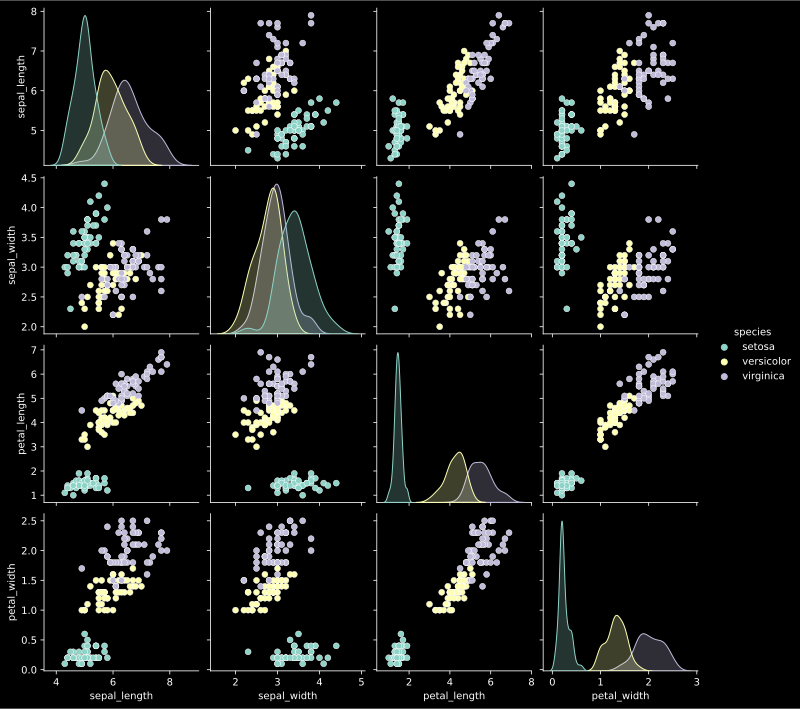

In [9]:
#genera la distribución para todos los pares individuales de features
sns.pairplot(df_iris, hue="species"); #indica que se muestre un color distinto para cada fila referente a una categoría concreta de especie

## Transformando los datos a tensores de `PyTorch`

In [20]:
df_iris.iloc[:,0:4].head() #serán nuestras características, X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [21]:
df_iris.iloc[:,-1]

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

In [173]:
from sklearn.preprocessing import LabelEncoder
#transformamos las etiquetas (y) de los datos a ser números desde 0 a n_clases-1
label_enc = LabelEncoder()

labels = label_enc.fit_transform(df_iris.species)

In [174]:
labels[4:]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

#### Vemos que las categorías no estaban "aleatoriamente" distribuidas, sino que "estaban dispuestas en orden de categoría". Normalmente, es preferible "aleatorizar las observaciones" para que las categorías estén de forma aleatoria distribuidas en los datos, para no introducir ningún sesgo

In [33]:
X = torch.tensor(df_iris.iloc[:,0:4].values).float() #matriz de características
y = torch.tensor(labels).long() #vector de las etiquetas transformadas a números (tipo de dato long() -> entero) #podiamos tambien haber hecho df.iris[df.iris.species=="setosa"] == 1 y así

## Creando el modelo

<img src="pytorch architecture.png" alt="architecture info"  width="500">


In [38]:
X.shape[1]#tenemos 4 inputs de entrada

4

In [47]:
len(y.unique()) #3 categorías distintas (etiquetas), 0,1 y 2 respectivamente

3

In [68]:
model = nn.Sequential(

    nn.Linear(X.shape[1], 64), #capa de entrada
    nn.ReLU(),
    nn.Linear(64,64), #capa oculta
    nn.ReLU(),
    nn.Linear(64,len(y.unique())) #capa de salida   
    #la función de pérdida CrossEntropyLoss() implementa en la misma clase la función Softmax de salida
)

In [69]:
model

Sequential(
  (0): Linear(in_features=4, out_features=64, bias=True)
  (1): ReLU()
  (2): Linear(in_features=64, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=3, bias=True)
)

### Como vimos, no definimos explícitamente `nn.Softmax()` en la última capa, debido a que la función de pérdidas `nn.CrossEntropyLoss()` lo implementa internamente

In [70]:
loss_func = nn.CrossEntropyLoss() #ver docs (usa LogSoftmax debido a la propiedad de los logaritmos de hacer los números pequeños "más espaciados")
#por lo que añade el logaritmo a la función softmax

learning_rate = 0.01

optim = torch.optim.SGD(model.parameters(), lr=learning_rate)

## Entrenando el modelo

### *Recuerda que las salidas del modelo son "valores en bruto" sin transformar en softmax, ya que lo hace internamente la función de pérdidas `CrossEntropyLoss()` usando el logaritmo de dicha función softmax, pero no lo aplica para nuevas predicciones que haga el modelo*

### Por tanto, al igual que si hubiera una función softmax aplicada, obtenemos los índices de los valores más grandes de las predicciones de "valores en bruto" del modelo

In [71]:
n_epochs = 1000

In [72]:
losses = torch.zeros(n_epochs) #para almacenar las pérdidas para cada epoch
accuracies = [] #almacenamos la métrica de precisión en cada epoch

for epoch in tqdm(range(n_epochs)):

    #forward pass
    y_hat = model(X)

    #compute error
    loss = loss_func(y_hat, y)
    losses[epoch] = loss

    #backward pass
    optim.zero_grad() #clear previous gradients cache
    loss.backward() #compute gradients based on the error
    optim.step() #update parameters
    
    #calculamos la precisión
    #(examinamos así como cambia la precisión con el paso de las epochs)
    #ejemplo prediccion (sin softmax, valor "en bruto"): [2, 4, 3] nos da para cada clase, su probabilidad
    #obtiendo el argmax, obtenemos 0, nos da el índice, que coincide con la numeración real de categorías
    matches = torch.argmax(y_hat, axis=1) == y #obtenemos para cada output del modelo, el índice de la salida más alta -> categoría
    matches_num = matches.float()
    
    #la media de predicciones acertadas multiplicada por 100
    acc_pct = 100*torch.mean(matches_num)    
    accuracies.append(acc_pct)
    
# #"final forward pass" - post entrenamiento
preds = model(X)
preds_labels = torch.argmax(preds, axis=1)
total_acc = 100*torch.mean((preds_labels == y).float())
print(f"Final model accuracy: {total_acc}%")

100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1321.84it/s]

Final model accuracy: 98.0%


In [120]:
model(X)[:3]

tensor([[  8.5370,   3.4410, -12.8201],
        [  7.7399,   3.2532, -11.7683],
        [  7.8755,   3.2005, -11.8518]], grad_fn=<SliceBackward0>)

### Efectivamente, vemos que las salidas del modelo son simplemente numéricas, no son probabilidades de la función softmax, dado que a pesar de implementarlo `CrossEntropyLoss()`, no lo refleja en las salidas del modelo. Por tanto, al validar con las etiquetas reales, buscamos `argmax`, al igual que si fueran probabilidades, las mismas "salidas en bruto"

In [121]:
torch.sum(y_hat, axis=1) #efectivamente, no suman hasta 1 como sí lo haría la función softmax

tensor([-0.8415, -0.7746, -0.7754, -0.7090, -0.8270, -0.8262, -0.7332, -0.8098,
        -0.6792, -0.7861, -0.8894, -0.7469, -0.7855, -0.7328, -1.0017, -0.9371,
        -0.8895, -0.8279, -0.8960, -0.8242, -0.8230, -0.8072, -0.8035, -0.7169,
        -0.7324, -0.7359, -0.7313, -0.8510, -0.8577, -0.7101, -0.7159, -0.8226,
        -0.8776, -0.9339, -0.7596, -0.8337, -0.9172, -0.8245, -0.7127, -0.8297,
        -0.8200, -0.6109, -0.7196, -0.7115, -0.7604, -0.7301, -0.8209, -0.7443,
        -0.8724, -0.8219, -0.9419, -0.8385, -0.8907, -0.6663, -0.8101, -0.7257,
        -0.8058, -0.6615, -0.8742, -0.6462, -0.6347, -0.7535, -0.7909, -0.7724,
        -0.7355, -0.8914, -0.6935, -0.8067, -0.7054, -0.7450, -0.6926, -0.8043,
        -0.7349, -0.7987, -0.8547, -0.8716, -0.8674, -0.8069, -0.7470, -0.7783,
        -0.7233, -0.7459, -0.7751, -0.6786, -0.6611, -0.7725, -0.8681, -0.7737,
        -0.7450, -0.6871, -0.6960, -0.7878, -0.7631, -0.6690, -0.7142, -0.7748,
        -0.7497, -0.8247, -0.6671, -0.74

_________

## Visualización del modelo

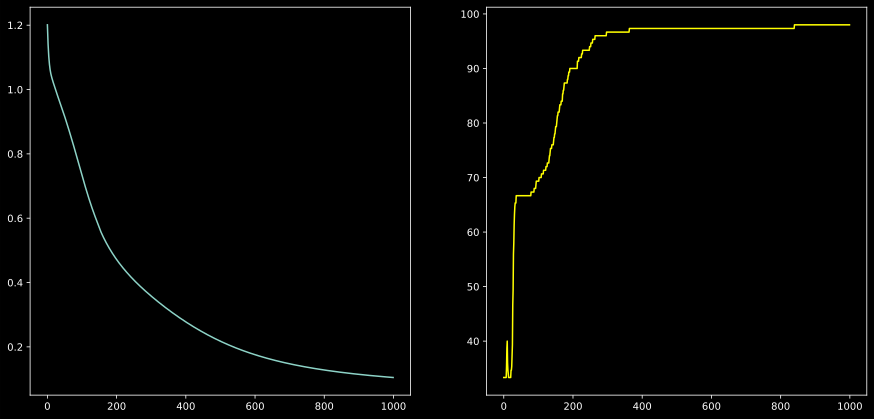

In [119]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15,7), sharex=True)

axs[0].plot(losses.detach()); #"o"
axs[0].set_xlabel("Epoch")
axs[0].set_ylabel("Loss")


axs[1].plot(accuracies, color="yellow");
axs[1].set_xlabel("Epoch")
axs[1].set_ylabel("Total Accuracy")

### Vemos la gráfica de la pérdida (derecha) y la precisión (izquierda) a lo largo de las epochs (eje x)

- ### La pérdida va decreciendo con el paso de las epochs forma correcta, pero parece tener un intervalo donde bajó más lentamente, que coincide con alrededor de las 50 epochs aproximadamente

- ### En cuanto a la precisión, comienza siendo prácticamente constante (el modelo "no aprendía") durante ese pequeño intervalo, después comienza a "aprender" (sube la precisión) y luego vuelve a bajar apenas en el comienzo del entrenamiento. Durante el intervalo 50, comienza a tener nuevamente la precisión constante, y depués vuelve a ir subiendo progresivamente "con pequeños escalones" (donde permanece un pequeño periodo de epochs "sin mejorar" y luego vuelve a "seguir mejorando")

_____

## Para ver cómo la función softmax transformaría las predicciones, usaremos los "valores en bruto del modelo" para transformar dichos datos, y comprobar que suman 1 todas las probabilidades

In [122]:
softmax_func = nn.Softmax(dim=1)

In [124]:
softmax_func(preds)[:3]

tensor([[9.9390e-01, 6.0962e-03, 5.3565e-10],
        [9.8885e-01, 1.1153e-02, 3.3816e-09],
        [9.9074e-01, 9.2567e-03, 2.7216e-09]], grad_fn=<SliceBackward0>)

In [126]:
torch.sum(softmax_func(preds), axis=1)

tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 

____________

## Graficamos ahora cómo lucen los valores "en bruto" del modelo, y cómo son convertidos con la función softmax a probabilidades

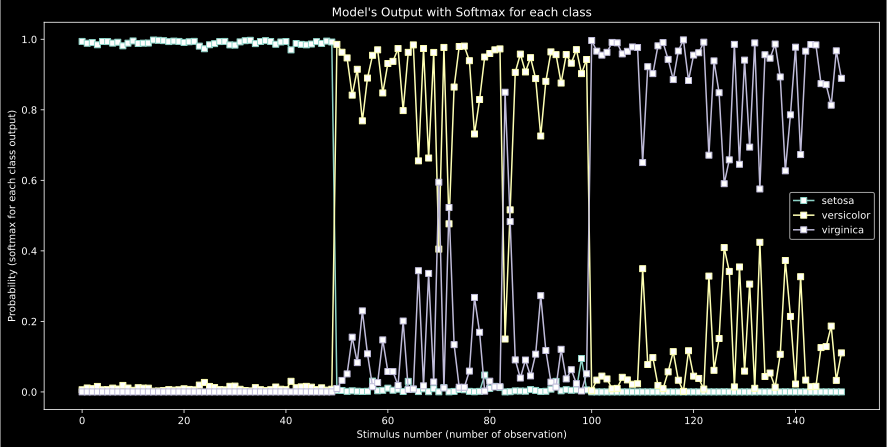

In [151]:
# plot the raw model outputs

fig = plt.figure(figsize=(15,7))
plt.title("Model's Output with Softmax for each class")
plt.plot(softmax_func(preds).detach(), 's-',markerfacecolor='w') #'s-',markerfacecolor='w'
plt.xlabel('Stimulus number (number of observation)')
plt.ylabel('Probability (softmax for each class output)')
plt.legend(['setosa','versicolor','virginica'])
plt.show()

# try it again without the softmax!

### **- Si recordamos, el primer tercio de los datos pertenecía a la clase setosa, después versicolor en el segundo tercio, y por último virginica.** (ya que los datos no estaban distribuidos aleatoriamente)

### En el eje x, tenemos las distintas observaciones del set de datos, y en el eje y, la probabilidad que dió el modelo a cada clase (aplicando softmax a cada una de las 3 salidas en bruto del modelo)

________

- ### Este es el escenario deseable, ya que vemos que para el primer tercio de gráfica, las probabilidades más altas (cercanas al 100%) las poseían la clase setosa, la cual es realmente la que pertenece a dichas observaciones

- ### En el segundo tercio de gráfico, efectivamente las probabilidades más altas se las lleva la clase versicolor, (la cual es realmente), pero también parecen haber probabilidades de en torno al 60% para observaciones que realmente eran versicolor (color amarillo). **Por tanto, en esta franja, hay más incertidumbre**

- ### Para la tercera zona, el modelo da a las observaciones una probabilidad más alta de ser virginica, (la cual realmente es), y ciertas probabilidades cercanas al 40% a la clase versicolor. En cambio, para la clase setosa, el modelo está totalmente seguro que no es, ya que lé asignó un 0% de probabilidad

__________

### Veamos ahora la gráfica, pero esta vez, para cada observación, obtenemos el valor "en bruto" para cada una de las 3 salidas del modelo, **sin usar softmax**

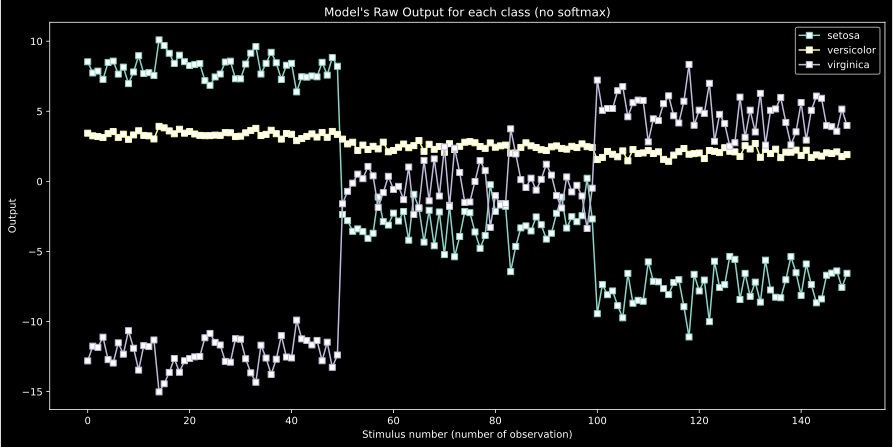

In [150]:
# plot the raw model outputs

fig = plt.figure(figsize=(15,7))

plt.title("Model's Raw Output for each class (no softmax)")
plt.plot((y_hat).detach(), 's-',markerfacecolor='w') #'s-',markerfacecolor='w'
plt.xlabel('Stimulus number (number of observation)')
plt.ylabel('Output')
plt.legend(['setosa','versicolor','virginica'])
plt.show()

# try it again without the softmax!

### **Podemos ver, cómo al no usar softmax, hay valores que apenas podemos identificar, como el caso de la clase versicolor, cuyas salidas "en bruto" del modelo prácticamente son iguales a simple vista, sin ser transformadas en probabilidades**

____________

### Additional Explorations C:\Users\pablo\Mi unidad\Neural Networks\resources\courses\Udemy\A deep understanding of deep learning (with Python intro) - Mike X Cohen\code\ANN\DUDL_ANN_multioutput.ipynb

1) When the loss does not reach an asymptote, it's a good idea to train the model for more epochs. Increase the number of
   epochs until the plot of the losses seems to hit a "floor" (that's a statistical term for being as small as possible).

In [2]:
import seaborn as sns

df_iris = sns.load_dataset("iris")

In [3]:
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
from sklearn.preprocessing import LabelEncoder
#transformamos las etiquetas (y) de los datos a ser números desde 0 a n_clases-1
label_enc = LabelEncoder()

labels = label_enc.fit_transform(df_iris.species)

In [5]:
X = torch.tensor(df_iris.iloc[:,0:4].values).float() #matriz de características
y = torch.tensor(labels).long() #vector de las etiquetas transformadas a números (tipo de dato long() -> entero) #podiamos tambien haber hecho df.iris[df.iris.species=="setosa"] == 1 y así

In [15]:
model = nn.Sequential(

    nn.Linear(X.shape[1], 64), #capa de entrada
    nn.ReLU(),
    nn.Linear(64,64), #capa oculta
    nn.ReLU(),
    nn.Linear(64,len(y.unique())) #capa de salida   
    #la función de pérdida CrossEntropyLoss() implementa en la misma clase la función Softmax de salida
)

In [16]:
loss_func = nn.CrossEntropyLoss() #ver docs (usa LogSoftmax debido a la propiedad de los logaritmos de hacer los números pequeños "más espaciados")
#por lo que añade el logaritmo a la función softmax

learning_rate = 0.01

optim = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [17]:
n_epochs = 1000

In [18]:
losses = torch.zeros(n_epochs) #para almacenar las pérdidas para cada epoch
accuracies = [] #almacenamos la métrica de precisión en cada epoch

for epoch in tqdm(range(n_epochs)):

    #forward pass
    y_hat = model(X)

    #compute error
    loss = loss_func(y_hat, y)
    losses[epoch] = loss

    #backward pass
    optim.zero_grad() #clear previous gradients cache
    loss.backward() #compute gradients based on the error
    optim.step() #update parameters
    
    #calculamos la precisión
    #(examinamos así como cambia la precisión con el paso de las epochs)
    #ejemplo prediccion (sin softmax, valor "en bruto"): [2, 4, 3] nos da para cada clase, su probabilidad
    #obtiendo el argmax, obtenemos 0, nos da el índice, que coincide con la numeración real de categorías
    matches = torch.argmax(y_hat, axis=1) == y #obtenemos para cada output del modelo, el índice de la salida más alta -> categoría
    matches_num = matches.float()
    
    #la media de predicciones acertadas multiplicada por 100
    acc_pct = 100*torch.mean(matches_num)    
    accuracies.append(acc_pct)
    
# #"final forward pass" - post entrenamiento
preds = model(X)
preds_labels = torch.argmax(preds, axis=1)
total_acc = 100*torch.mean((preds_labels == y).float())
print(f"Final model accuracy: {total_acc}%")

100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1237.39it/s]

Final model accuracy: 98.66667175292969%


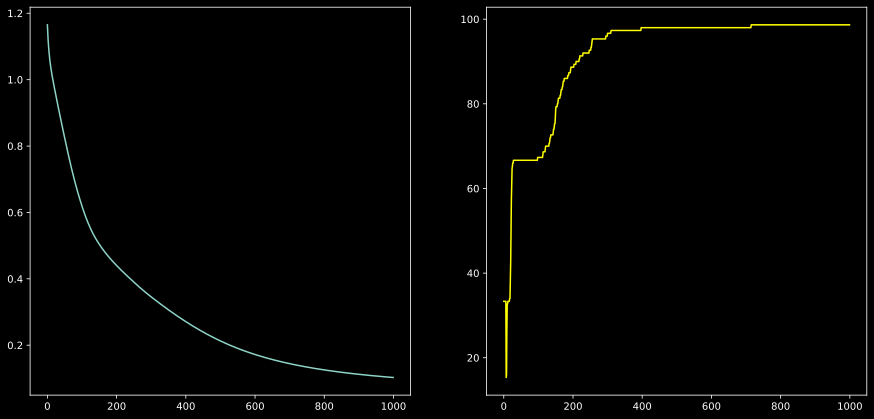

In [19]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15,7), sharex=True)

axs[0].plot(losses.detach()); #"o"

axs[1].plot(accuracies, color="yellow");

2) We used a model with 64 hidden units. Modify the code to have 16 hidden units. How does this model perform? If there
   is a decrease in accuracy, is that decrease distributed across all three iris types, or does the model learn some
   iris types and not others?

In [20]:
import seaborn as sns

df_iris = sns.load_dataset("iris")

In [21]:
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [22]:
from sklearn.preprocessing import LabelEncoder
#transformamos las etiquetas (y) de los datos a ser números desde 0 a n_clases-1
label_enc = LabelEncoder()

labels = label_enc.fit_transform(df_iris.species)

In [23]:
X = torch.tensor(df_iris.iloc[:,0:4].values).float() #matriz de características
y = torch.tensor(labels).long() #vector de las etiquetas transformadas a números (tipo de dato long() -> entero) #podiamos tambien haber hecho df.iris[df.iris.species=="setosa"] == 1 y así

In [24]:
model = nn.Sequential(

    nn.Linear(X.shape[1], 16), #capa de entrada
    nn.ReLU(),
    nn.Linear(16,16), #capa oculta
    nn.ReLU(),
    nn.Linear(16,len(y.unique())) #capa de salida   
    #la función de pérdida CrossEntropyLoss() implementa en la misma clase la función Softmax de salida
)

In [25]:
loss_func = nn.CrossEntropyLoss() #ver docs (usa LogSoftmax debido a la propiedad de los logaritmos de hacer los números pequeños "más espaciados")
#por lo que añade el logaritmo a la función softmax

learning_rate = 0.01

optim = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [26]:
n_epochs = 1000

In [27]:
losses = torch.zeros(n_epochs) #para almacenar las pérdidas para cada epoch
accuracies = [] #almacenamos la métrica de precisión en cada epoch

for epoch in tqdm(range(n_epochs)):

    #forward pass
    y_hat = model(X)

    #compute error
    loss = loss_func(y_hat, y)
    losses[epoch] = loss

    #backward pass
    optim.zero_grad() #clear previous gradients cache
    loss.backward() #compute gradients based on the error
    optim.step() #update parameters
    
    #calculamos la precisión
    #(examinamos así como cambia la precisión con el paso de las epochs)
    #ejemplo prediccion (sin softmax, valor "en bruto"): [2, 4, 3] nos da para cada clase, su probabilidad
    #obtiendo el argmax, obtenemos 0, nos da el índice, que coincide con la numeración real de categorías
    matches = torch.argmax(y_hat, axis=1) == y #obtenemos para cada output del modelo, el índice de la salida más alta -> categoría
    matches_num = matches.float()
    
    #la media de predicciones acertadas multiplicada por 100
    acc_pct = 100*torch.mean(matches_num)    
    accuracies.append(acc_pct)
    
# #"final forward pass" - post entrenamiento
preds = model(X)
preds_labels = torch.argmax(preds, axis=1)
total_acc = 100*torch.mean((preds_labels == y).float())
print(f"Final model accuracy: {total_acc}%")

100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1523.16it/s]

Final model accuracy: 98.0%


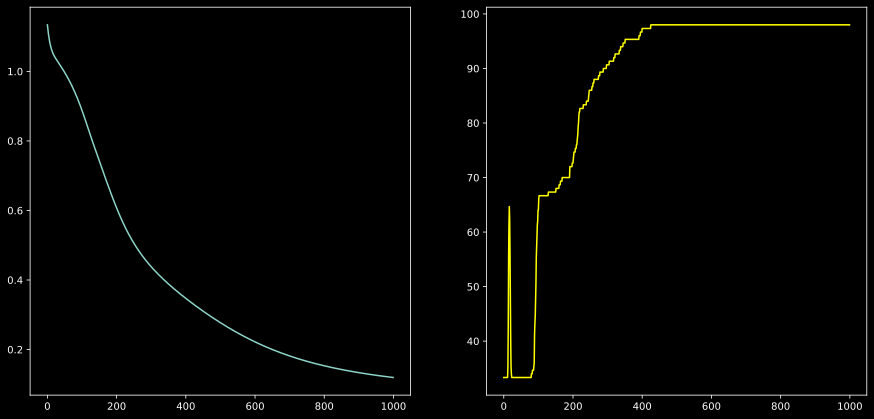

In [28]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15,7), sharex=True)

axs[0].plot(losses.detach()); #"o"

axs[1].plot(accuracies, color="yellow");

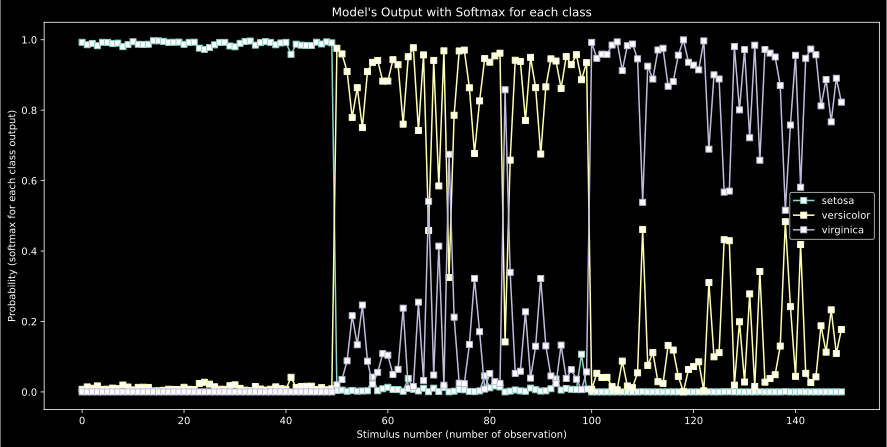

In [30]:
# plot the raw model outputs
softmax_func = nn.Softmax(dim=1)
fig = plt.figure(figsize=(15,7))
plt.title("Model's Output with Softmax for each class")
plt.plot(softmax_func(y_hat).detach(), 's-',markerfacecolor='w') #'s-',markerfacecolor='w'
plt.xlabel('Stimulus number (number of observation)')
plt.ylabel('Probability (softmax for each class output)')
plt.legend(['setosa','versicolor','virginica'])
plt.show()

# try it again without the softmax!

3) Write code to compute three accuracy scores, one for each iris type. In real DL projects, category-specific accuracies
   are often more informative than the aggregated accuracy.

In [31]:
import seaborn as sns

df_iris = sns.load_dataset("iris")

In [32]:
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [33]:
from sklearn.preprocessing import LabelEncoder
#transformamos las etiquetas (y) de los datos a ser números desde 0 a n_clases-1
label_enc = LabelEncoder()

labels = label_enc.fit_transform(df_iris.species)

In [99]:
X = torch.tensor(df_iris.iloc[:,0:4].values).float() #matriz de características
y = torch.tensor(labels).long() #vector de las etiquetas transformadas a números (tipo de dato long() -> entero) #podiamos tambien haber hecho df.iris[df.iris.species=="setosa"] == 1 y así

In [152]:
model = nn.Sequential(

    nn.Linear(X.shape[1], 64), #capa de entrada
    nn.ReLU(),
    nn.Linear(64,64), #capa oculta
    nn.ReLU(),
    nn.Linear(64,len(y.unique())) #capa de salida   
    #la función de pérdida CrossEntropyLoss() implementa en la misma clase la función Softmax de salida
)

In [166]:
loss_func = nn.CrossEntropyLoss() #ver docs (usa LogSoftmax debido a la propiedad de los logaritmos de hacer los números pequeños "más espaciados")
#por lo que añade el logaritmo a la función softmax

learning_rate = 0.01

optim = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [167]:
n_epochs = 100

In [168]:
losses = torch.zeros(n_epochs) #para almacenar las pérdidas para cada epoch
accuracies = torch.zeros(n_epochs, len(y.unique())) #almacenamos la métrica de precisión en cada epoch

for epoch in tqdm(range(n_epochs)):

    #forward pass
    y_hat = model(X)

    #compute error
    loss = loss_func(y_hat, y)
    losses[epoch] = loss

    #backward pass
    optim.zero_grad() #clear previous gradients cache
    loss.backward() #compute gradients based on the error
    optim.step() #update parameters
    
    #calculamos la precisión
    matches = torch.argmax(y_hat, axis=1) == y #obtenemos para cada output del modelo, el índice de la salida más alta -> categoría

    
    
    # matches = torch.argmax(y_hat, axis=1) == y #obtenemos para cada output del modelo, el índice de la salida más alta -> categoría
    matches0 = torch.argmax(y_hat, axis=1)[torch.where(y==0)] == 0
    matches1 = torch.argmax(y_hat, axis=1)[torch.where(y==1)] == 1
    matches2 = torch.argmax(y_hat, axis=1)[torch.where(y==2)] == 2
    
    matches0_num, matches1_num, matches2_num = matches0.float(), matches1.float(), matches2.float()
    
    #la media de predicciones acertadas multiplicada por 100
    acc_pct_cat0, acc_pct_cat1, acc_pct_cat2 = 100*torch.mean(matches0_num), 100*torch.mean(matches1_num), 100*torch.mean(matches2_num)    
    
    accuracies[epoch, 0], accuracies[epoch, 1], accuracies[epoch, 2] = acc_pct_cat0, acc_pct_cat1, acc_pct_cat2
    
    
# #"final forward pass" - post entrenamiento
preds = model(X)

matches0 = torch.argmax(preds, axis=1)[torch.where(y==0)] == 0
matches1 = torch.argmax(preds, axis=1)[torch.where(y==1)] == 1
matches2 = torch.argmax(preds, axis=1)[torch.where(y==2)] == 2

total_acc_cat0, total_acc_cat1, total_acc_cat2 = 100*torch.mean((matches0).float()), 100*torch.mean((matches1).float()), 100*torch.mean((matches2).float())
print("Final model accuracy:\n"
     f"- Class 0 (iris {df_iris.species.unique()[0]}): {total_acc_cat0}%\n"
     f"- Class 1 (iris {df_iris.species.unique()[1]}): {total_acc_cat1}% \n"
     f"- Class 2 (iris {df_iris.species.unique()[2]}): {total_acc_cat2}%")

100%|███████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 552.36it/s]

Final model accuracy:
- Class 0 (iris setosa): 100.0%
- Class 1 (iris versicolor): 76.0% 
- Class 2 (iris virginica): 100.0%


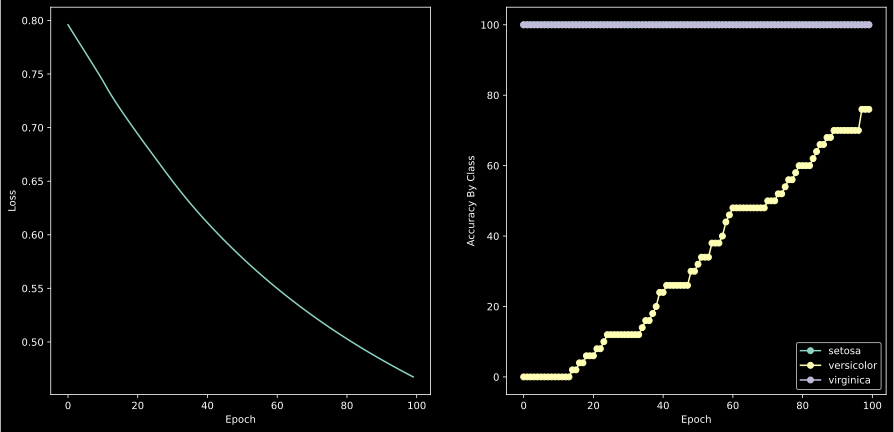

In [169]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15,7), sharex=True)

axs[0].plot(losses.detach()); #"o"

axs[1].plot(accuracies[:,0], "o-");
axs[1].plot(accuracies[:,1], "o-");
axs[1].plot(accuracies[:,2], "o-");
axs[1].legend([f"{df_iris.species.unique()[0]}", f"{df_iris.species.unique()[1]}", f"{df_iris.species.unique()[2]}"]);

axs[0].set_xlabel("Epoch")
axs[0].set_ylabel("Loss")


axs[1].set_xlabel("Epoch")
axs[1].set_ylabel("Accuracy By Class");

Parece que le cuesta en este caso, al modelo clasificar iris versicolor

______